In [1]:
import numpy as np
import uproot
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import integrate
from scipy import signal
from scipy.fft import fftshift
from pylab import rcParams
rcParams['figure.figsize'] = 15, 11

import AnaUtils as au

In [2]:
# filter parameters
A = 1.0
B = 0.5
n = 1
m = n
fWidth = 2*n + m
fmask = np.concatenate((B*np.ones(shape=n),-A*np.ones(shape=m),B*np.ones(shape=n)))

In [3]:
waveArr = au.ReadDDC10_BinWave("/data/share/KA0206_BarrelDry_Gain/200311_BPS",True)
print(waveArr[0].shape)
waveArr[1]

(100000, 2, 350)


{'numEvents': 100000,
 'numSamples': 350,
 'chMap': array([1, 0, 0, 1]),
 'numChan': 2,
 'liveTimes_s': array([3.80000000e-06, 8.75204667e-03, 7.59033500e-03, ...,
        7.82575500e-03, 7.79127167e-03, 7.27168833e-03]),
 'totliveTime_s': 731.2322502633334}

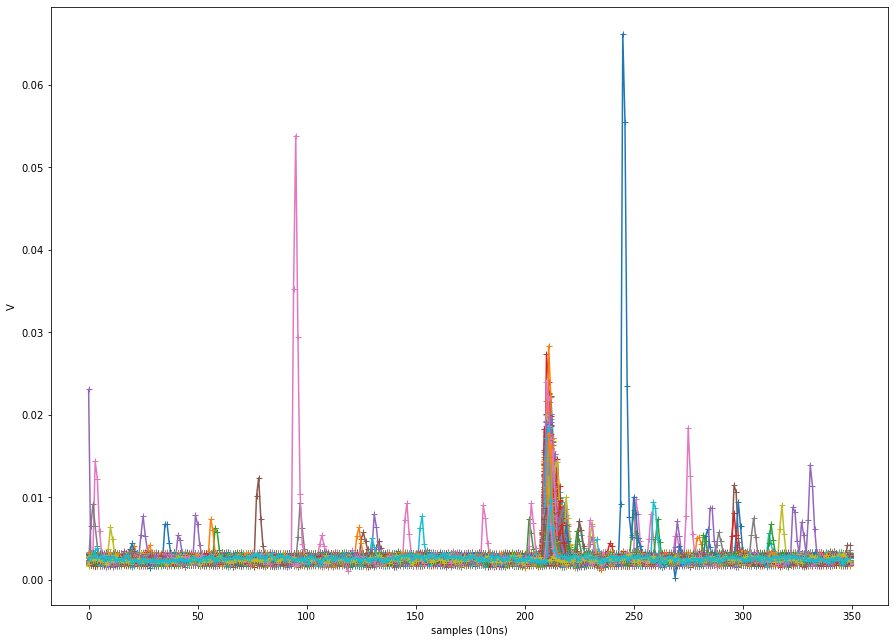

In [4]:
au.plotWaves(waveArr[0],chan=1,nWaves=1000)

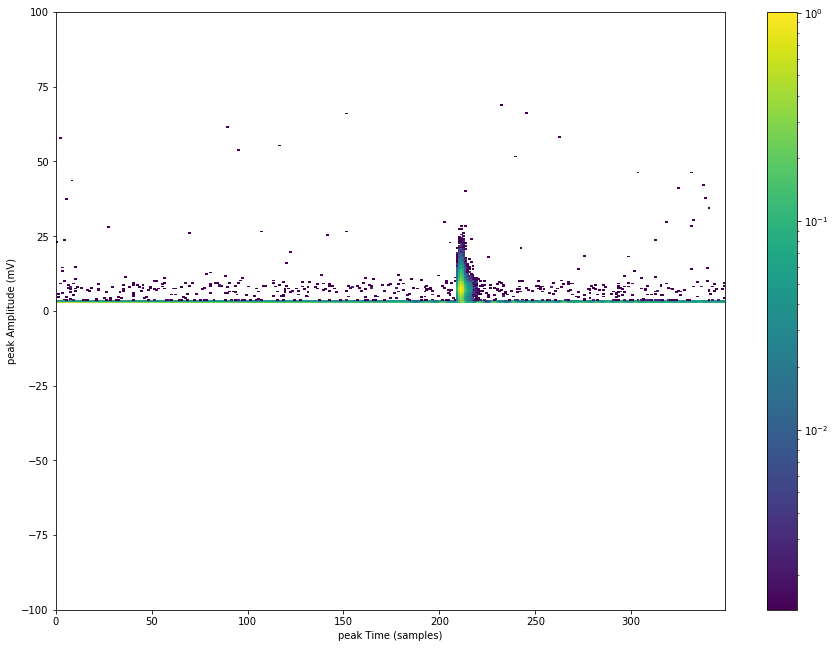

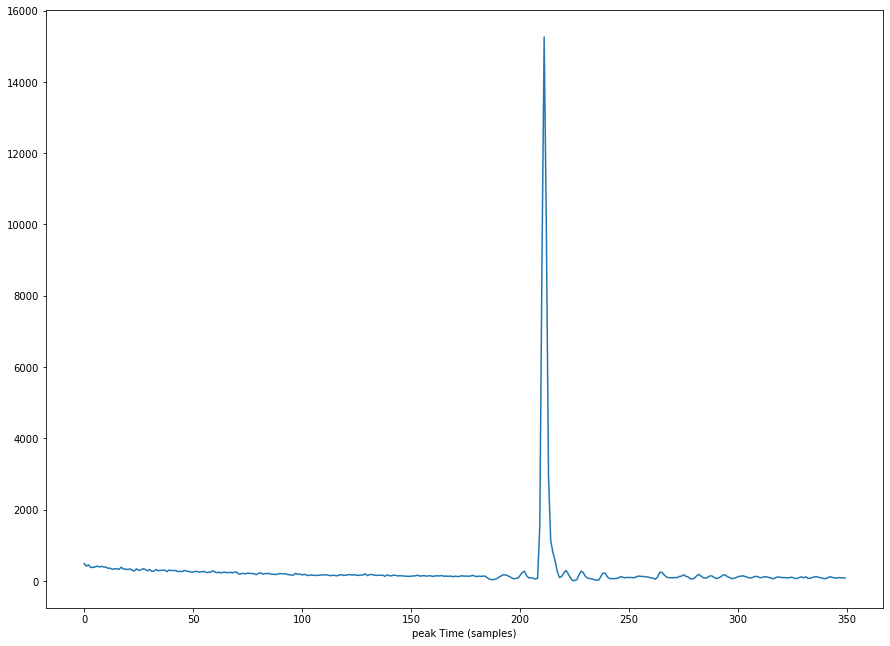

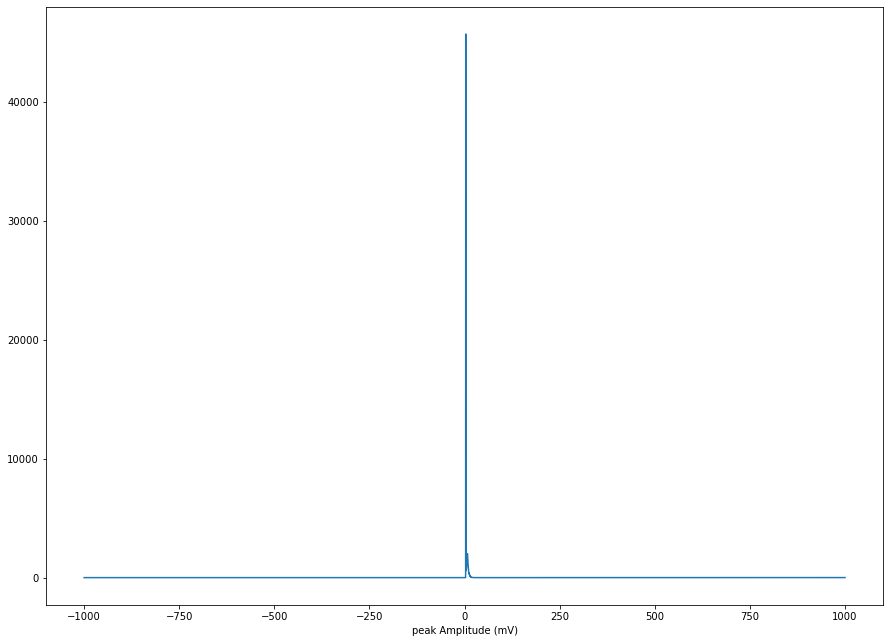

In [8]:
pHist = au.peakHist(waveArr,yrange=(-100,100),chan=1)

TypeError: list indices must be integers or slices, not tuple

In [ ]:
plt.figure()
for i in range(5000):
    #plt.plot(filteredWave[i,:],marker='x')
    plt.plot(waveArr[i,1,:],marker='+')
#plt.plot(waveArr[1000,1,:],marker='+')
#plt.plot(waveArr[500,2,:],marker='x')
plt.xlim((170,350))
#plt.yscale('log')
plt.show()

In [ ]:
#total event charge
waveQBase = 1e3*integrate.simps(waveArr[...,:nBaseSamps],axis=2)*sampleWidth_ns/resistance_ohm
waveQ_pC = 1e3*integrate.simps(waveArr[...,200:250],axis=2)*sampleWidth_ns/resistance_ohm
#len(waveInfo['liveTimes_s'])

#baseMask = np.absolute(waveQBase*np.reciprocal(nBaseSamps*waveBaserms.flatten()))<2

print(waveBaseline)
waveQ_pC

In [ ]:
plt.figure()
prange = [-20,100]
nBins = 10000
spacing = (prange[1]-prange[0])/nBins
#goodWaveQ = waveQ_pC[baseMask]
Qhist1 = np.histogram(waveQ_pC[:,1],nBins,range=prange,weights=np.ones(shape=waveQ_pC[:,1].shape)/waveInfo['totliveTime_s'])
#Qhist2d = np.histogram2d(waveQ_pC[:,1],waveQ_pC[:,2],bins=nBins,range = [prange,prange])

#plt.pcolormesh(Qhist2d[1][:-1],Qhist2d[2][:-1],Qhist2d[0]/waveInfo['totliveTime_s'],norm=mpl.colors.LogNorm())
plt.plot(Qhist1[1][:-1],Qhist1[0])
plt.xlabel('Q1 [pC]')
#plt.ylabel('Q2 [pC]')
#plt.xlim((-3,100))
plt.yscale('log')
#cbar = plt.colorbar()
plt.show()
#print(int((1-prange[0])/spacing))
#print('Integrated Rate > 1pC = '+str(np.sum(Qhist2d[0][int((1.0-prange[0])/spacing):]))+' Hz')

In [ ]:
plt.plot(Qhist1[1][:-1],Qhist1[0])
plt.xlabel('Q1 [pC]')
#plt.ylabel('Q2 [pC]')
plt.xlim((-20,30))
#plt.yscale('log')
#cbar = plt.colorbar()
plt.show()

In [ ]:
Qratio = waveQ_pC[:,1]/waveQ_pC[:,2]
Qratiohist = np.histogram(Qratio,bins=5000,range=(-2,20))
plt.plot(Qratiohist[1][:-1],Qratiohist[0])
#plt.yscale('log')
plt.xlim((10,18))
#plt.xticks(np.arange(13, 15, step=0.25))

In [ ]:
testEv = waveArr[1]
plt.plot(testEv[1],marker='+')
plt.plot(testEv[2],marker='x')
plt.xlim((190,250))
#plt.yscale('log')
plt.show()

In [ ]:
def LoGkernel(size=3,sigma=1,scale=1):
    sigma2 = sigma*sigma
    kernel = np.ones(size)
    x = (np.arange(size) - (size-1)/2.0)*scale
    kernel = (x*x/sigma2 - kernel)/sigma2
    x2 = np.exp(-x*x/(2*sigma2))
    print(x)
    print(kernel)
    return kernel*x2
def mycorrelate(kernel,arr):
    np.correlate(arr,kernel,mode="full")

In [ ]:
ksize = 3
ksigma = 1
kernel = LoGkernel(ksize,ksigma,2)
print(kernel)

In [ ]:
filtered = np.correlate(testEv[2],kernel,mode="full")[int(ksize/2):-int(ksize/2)]
print(filtered.shape)
plt.plot(filtered,marker='x')
plt.plot(testEv[2],marker='+')
plt.xlim((200,220))